In [1]:
# imports and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import prepare

# supress scientific notation
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 78
pd.options.display.max_rows = 60

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('PlayerData.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 2087
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PlayerID                               371 non-null    int64  
 1   Player_Name                            371 non-null    object 
 2   Age                                    371 non-null    float64
 3   Height                                 368 non-null    float64
 4   MaxRank                                371 non-null    float64
 5   Hand                                   371 non-null    object 
 6   Country                                371 non-null    object 
 7   win_count                              371 non-null    float64
 8   lose_count                             371 non-null    float64
 9   match_count                            371 non-null    float64
 10  win%                                   371 non-null    float64
 11  aces_

In [3]:
df.sample(5)

,PlayerID,Player_Name,Age,Height,MaxRank,Hand,Country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game
3,210013,Martin Damm Sr,28.227242,188.0,67.0,R,CZE,19.0,32.0,51.0,0.37,31.0,19.0,50.0,0.980,0.546553,0.611743,0.693080,0.806999,31.0,19.0,50.0,0.980392
1780,105341,Thomas Fabbiano,28.410678,NaN,72.0,R,ITA,23.0,42.0,65.0,0.35,42.0,23.0,65.0,1.000,0.648480,0.676141,0.611030,0.696729,42.0,23.0,65.0,1.000000
996,104371,Ivo Minar,25.163587,183.0,62.0,R,CZE,28.0,49.0,77.0,0.36,48.0,26.0,74.0,0.961,0.582424,0.570861,0.639365,0.750471,48.0,26.0,74.0,0.961039
1530,105379,Aljaz Bedene,28.591376,181.0,43.0,R,SLO,73.0,90.0,163.0,0.45,89.0,69.0,158.0,0.969,0.557078,0.582150,0.693410,0.802061,89.0,69.0,158.0,0.969325
21,101532,Francisco Clavet,30.559890,183.0,20.0,L,ESP,69.0,83.0,152.0,0.45,83.0,66.0,149.0,0.980,0.632076,0.655836,0.620830,0.719775,83.0,66.0,149.0,0.980263


In [4]:
# # change df cols to lower case
# # Column names: remove white spaces and convert to lower case
# df.columns = df.columns.str.strip().str.lower()
# df.columns

In [5]:
# # get rid of spaces in the columns names
# df.player_name= df.player_name.str.replace(' ', '_')
# df.player_name= df.player_name.str.lower()
# df.player_name

In [6]:
def prep_player_data(df):
    '''
    - gets rid of capital letters in the columns' names and players name
    - substitutes ' ' for '_' in players name
    '''
    df.columns = df.columns.str.strip().str.lower()
    df.player_name= df.player_name.str.replace(' ', '_')
    df.player_name= df.player_name.str.lower()
    
    return df
    

In [7]:
df = prep_player_data(df)
df.head()

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game
0,103720,lleyton_hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.70,183.0,422.0,605.0,0.925,0.525558,0.539098,0.675974,0.773470,183.0,422.0,605.0,0.925076
1,102158,patrick_rafter,26.477755,185.0,2.0,R,AUS,97.0,44.0,141.0,0.69,40.0,86.0,126.0,0.894,0.637279,0.653328,0.700358,0.795185,40.0,86.0,126.0,0.893617
2,103017,nicolas_kiefer,22.535250,183.0,4.0,R,GER,217.0,162.0,379.0,0.57,150.0,205.0,355.0,0.937,0.514047,0.537990,0.689337,0.792370,150.0,205.0,355.0,0.936675
3,210013,martin_damm_sr,28.227242,188.0,67.0,R,CZE,19.0,32.0,51.0,0.37,31.0,19.0,50.0,0.980,0.546553,0.611743,0.693080,0.806999,31.0,19.0,50.0,0.980392
4,103264,mariano_puerta,26.904860,180.0,9.0,L,ARG,76.0,79.0,155.0,0.49,77.0,70.0,147.0,0.948,0.637432,0.680268,0.613399,0.746508,77.0,70.0,147.0,0.948387


In [8]:
df.playerid.duplicated().sum()

0

In [9]:
# players to analise 
rivals = ['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'] # Andy Roddick is not in the df   

In [10]:
roger_and_rivals = df[df['player_name'].isin(['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'])]
roger_and_rivals

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game
133,103819,roger_federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,202.0,866.0,1068.0,0.954,0.597457,0.629201,0.701538,0.796579,202.0,866.0,1068.0,0.954424
756,104745,rafael_nadal,22.228611,185.0,1.0,L,ESP,741.0,146.0,887.0,0.84,142.0,724.0,866.0,0.976,0.680257,0.683340,0.637243,0.748767,142.0,724.0,866.0,0.976325
997,104925,novak_djokovic,24.213552,188.0,1.0,R,SRB,670.0,143.0,813.0,0.82,134.0,645.0,779.0,0.958,0.635394,0.656273,0.653117,0.762887,134.0,645.0,779.0,0.958180
1075,104918,andy_murray,29.503080,190.0,1.0,R,GBR,496.0,158.0,654.0,0.76,154.0,476.0,630.0,0.963,0.559638,0.588219,0.668232,0.772850,154.0,476.0,630.0,0.963303


In [11]:
### create a player that is th average of rogers feder rivals 
rivals_df = df[df['player_name'].isin(['rafael_nadal', 'novak_djokovic', 'andy_murray'])]
rivals_df.mean()# will gi us the stats for the average top competitor for rafael nadal

playerid                                 104862.666667
age                                          25.315081
height                                      187.666667
maxrank                                       1.000000
win_count                                   635.666667
lose_count                                  149.000000
match_count                                 784.666667
win%                                          0.806667
aces_in_match_lost                          143.333333
aces_in_match_won                           615.000000
ace_count                                   758.333333
aces_per_game                                 0.965667
first_serve_percentage_match_lost             0.625097
first_serve_percentage_match_won              0.642611
first_serve_won_percentage_match_lost         0.652864
first_serve_won_percentage_match_won          0.761501
breakpoints_won_match_lost                  143.333333
breakpoints_won_match_won                   615.000000
breakpoint

In [12]:
# create the record of a player that is the average of the Nadals competition
median_record = {'playerid':'104862', 'player_name':'mean_rival', 'age':25.315081, 'height':188, 'maxrank':1, 'win_count':636, 'lose_count': 149,
                 'match_count':785, 'win%':0.81, 'aces_in_match_lost':143.33, 'aces_in_match_won':615,
                 'ace_count':758.33, 'aces_per_game':0.965667, 'first_serve_percentage_match_lost':0.625097,
                 'first_serve_percentage_match_won':0.642611,'first_serve_won_percentage_match_lost':0.652864,
                 'first_serve_won_percentage_match_won':0.761501, 'breakpoints_won_match_lost':143.33,
                 'breakpoints_won_match_won':615, 'breakpoint_count':758.33, 'breakpoints_per_game':0.965936}

roger_and_rivals = roger_and_rivals.append(median_record, ignore_index=True)

In [13]:
roger_and_rivals

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game
0,103819,roger_federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,202.00,866.0,1068.00,0.954000,0.597457,0.629201,0.701538,0.796579,202.00,866.0,1068.00,0.954424
1,104745,rafael_nadal,22.228611,185.0,1.0,L,ESP,741.0,146.0,887.0,0.84,142.00,724.0,866.00,0.976000,0.680257,0.683340,0.637243,0.748767,142.00,724.0,866.00,0.976325
2,104925,novak_djokovic,24.213552,188.0,1.0,R,SRB,670.0,143.0,813.0,0.82,134.00,645.0,779.00,0.958000,0.635394,0.656273,0.653117,0.762887,134.00,645.0,779.00,0.958180
3,104918,andy_murray,29.503080,190.0,1.0,R,GBR,496.0,158.0,654.0,0.76,154.00,476.0,630.00,0.963000,0.559638,0.588219,0.668232,0.772850,154.00,476.0,630.00,0.963303
4,104862,mean_rival,25.315081,188.0,1.0,NaN,NaN,636.0,149.0,785.0,0.81,143.33,615.0,758.33,0.965667,0.625097,0.642611,0.652864,0.761501,143.33,615.0,758.33,0.965936


In [14]:
roger_and_rivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playerid                               5 non-null      object 
 1   player_name                            5 non-null      object 
 2   age                                    5 non-null      float64
 3   height                                 5 non-null      float64
 4   maxrank                                5 non-null      float64
 5   hand                                   4 non-null      object 
 6   country                                4 non-null      object 
 7   win_count                              5 non-null      float64
 8   lose_count                             5 non-null      float64
 9   match_count                            5 non-null      float64
 10  win%                                   5 non-null      float64
 11  aces_in_ma

In [15]:
# change player id data type
# when adding mean_rival data types conflict
roger_and_rivals['playerid'] = roger_and_rivals.playerid.astype(int)
roger_and_rivals['maxrank'] = roger_and_rivals.maxrank.astype(int)

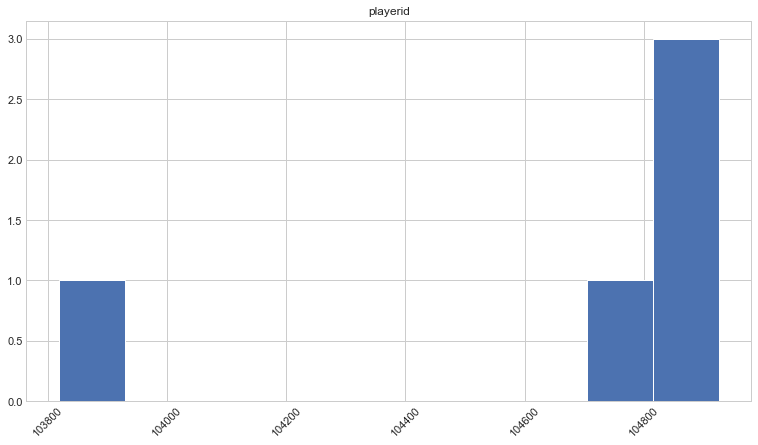

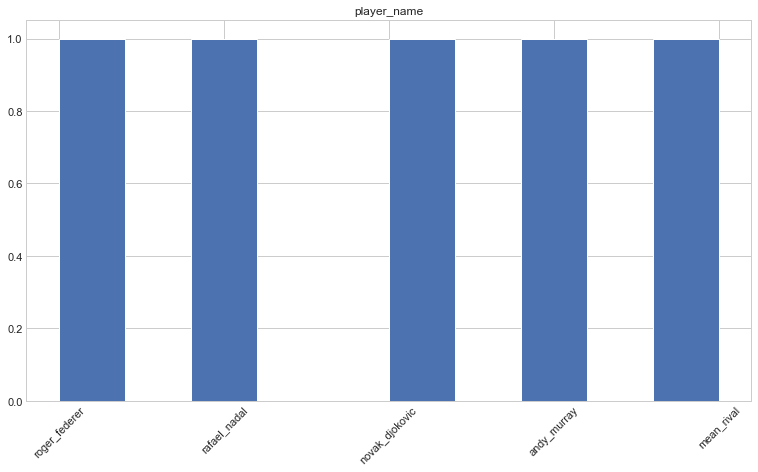

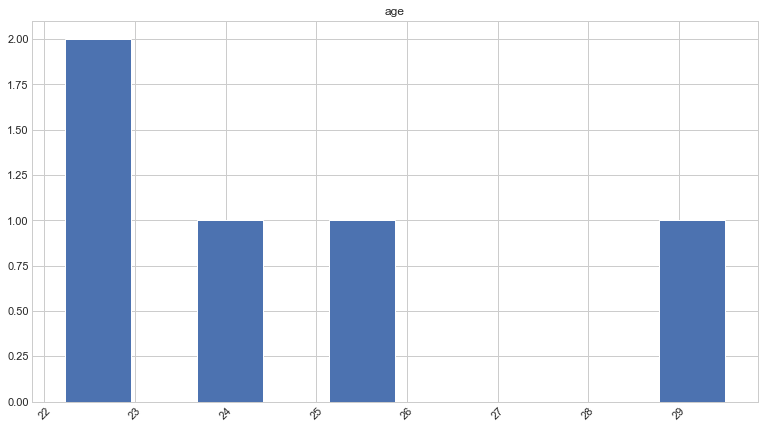

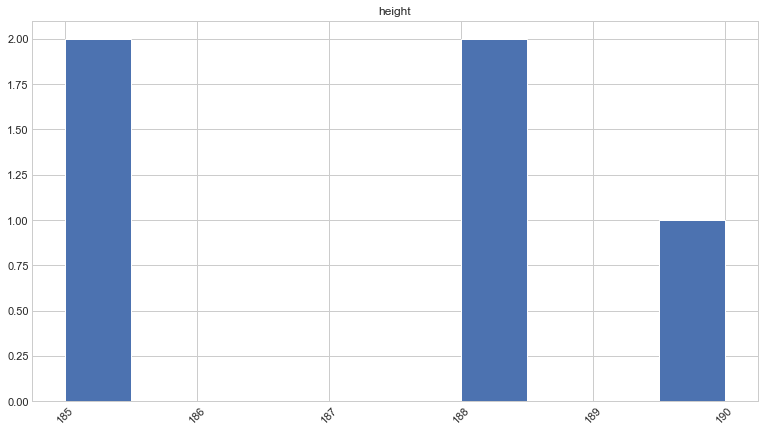

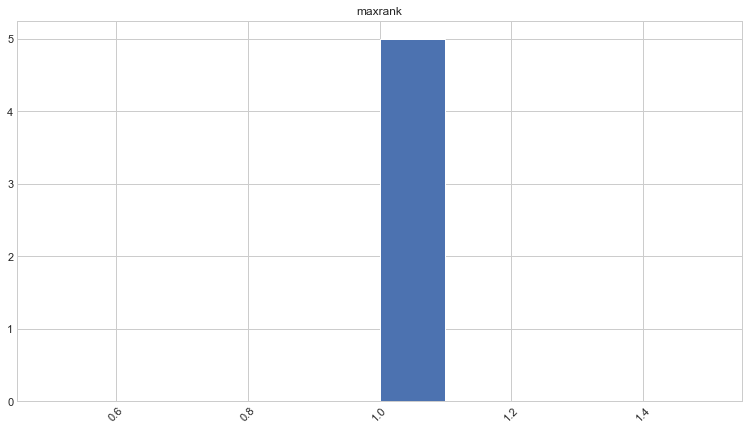

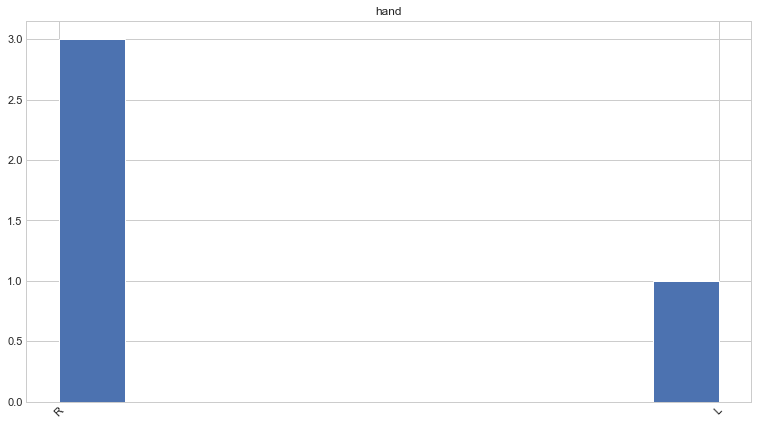

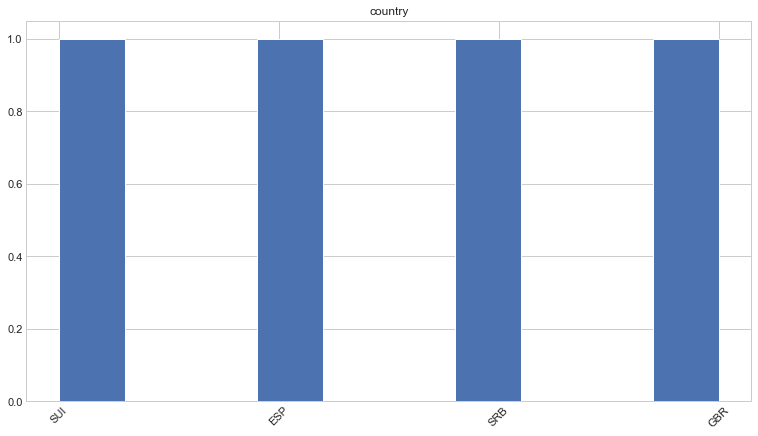

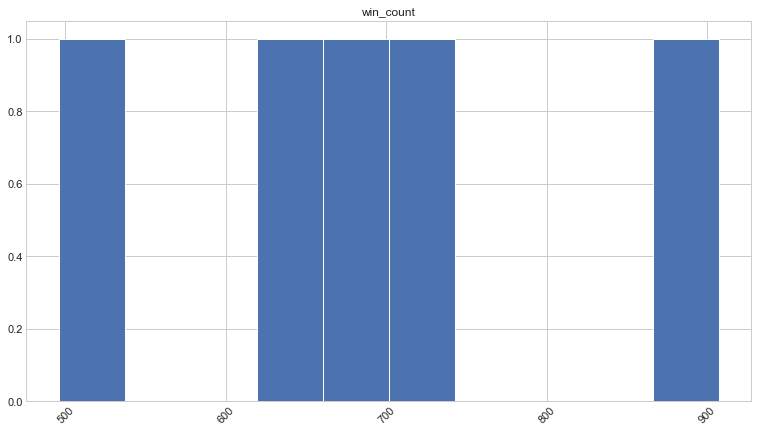

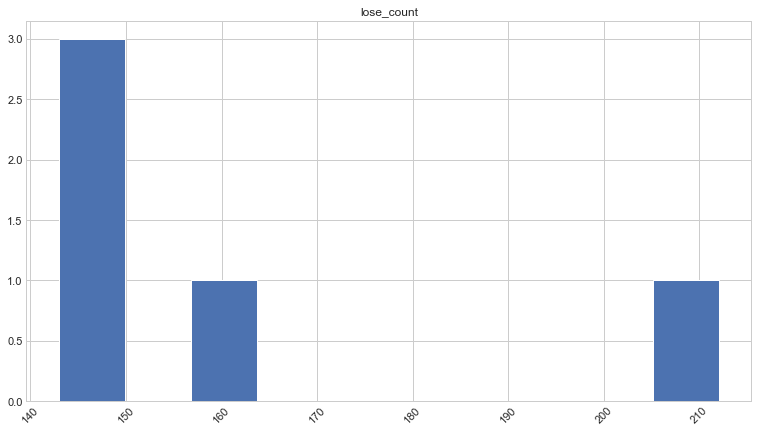

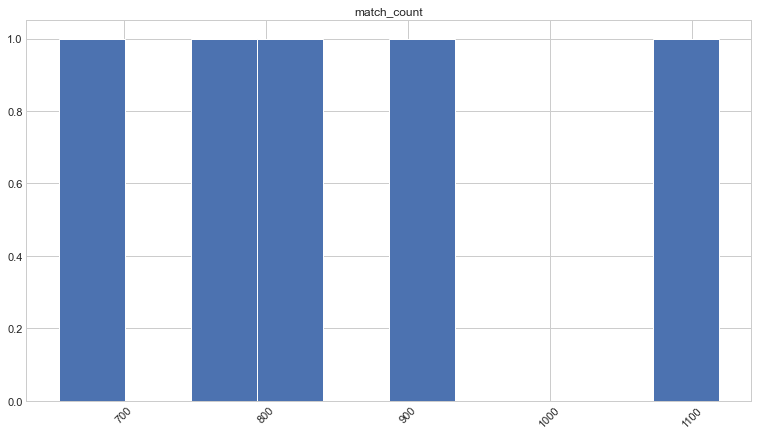

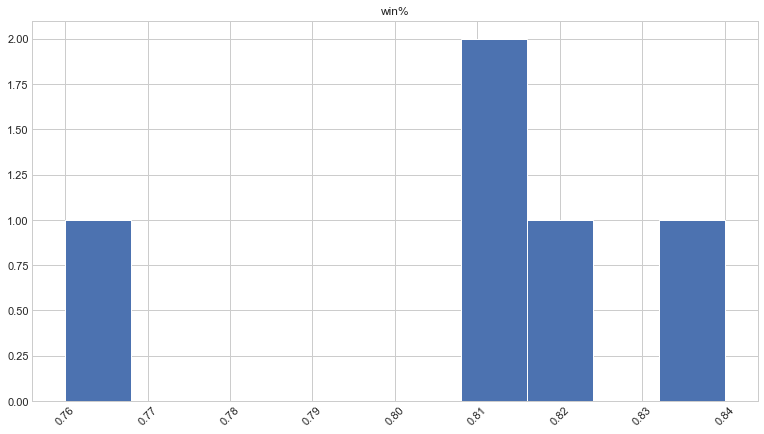

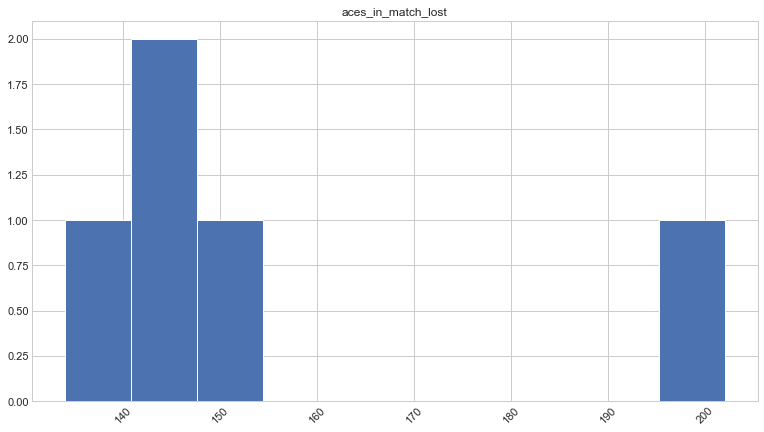

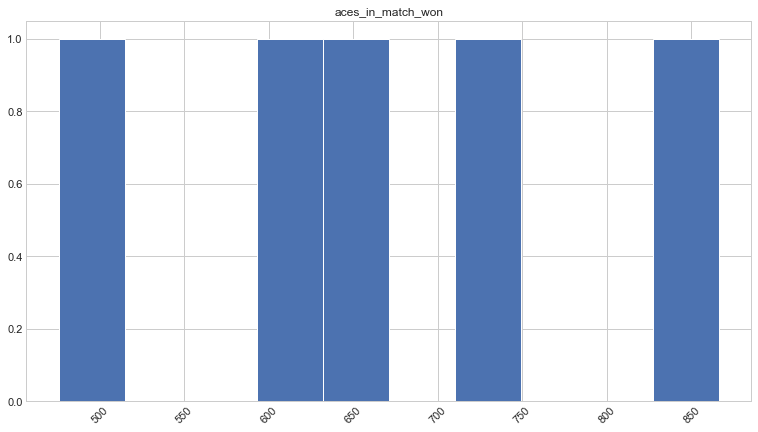

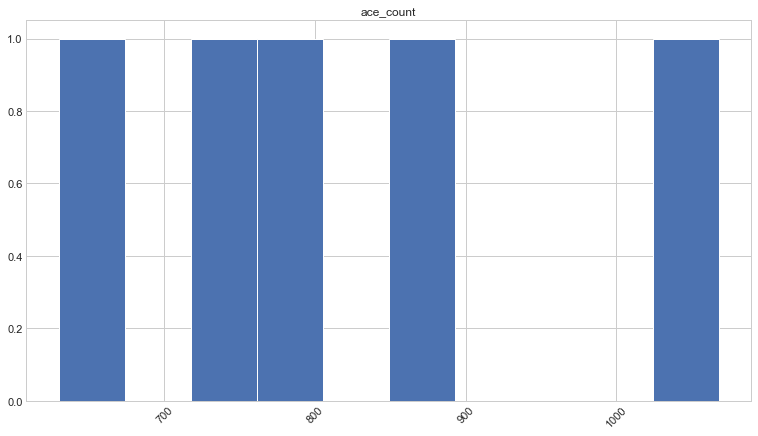

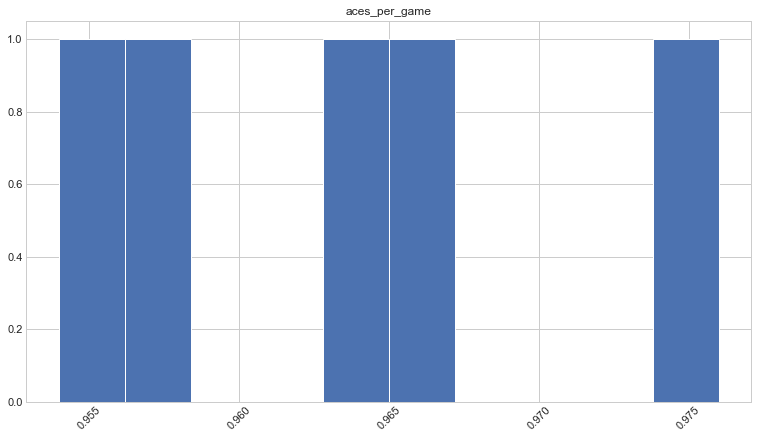

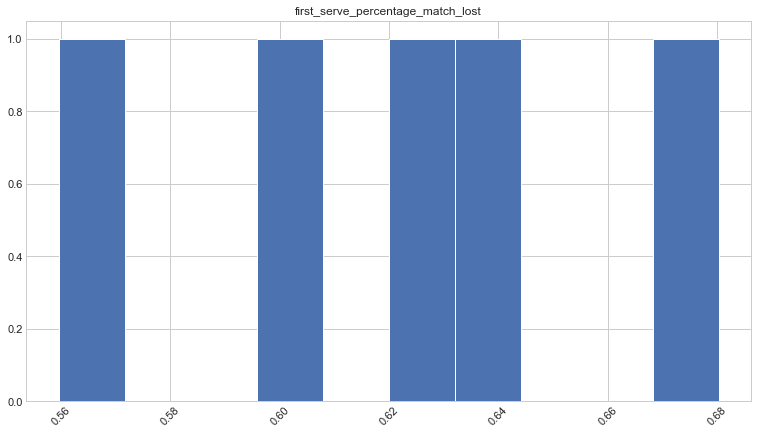

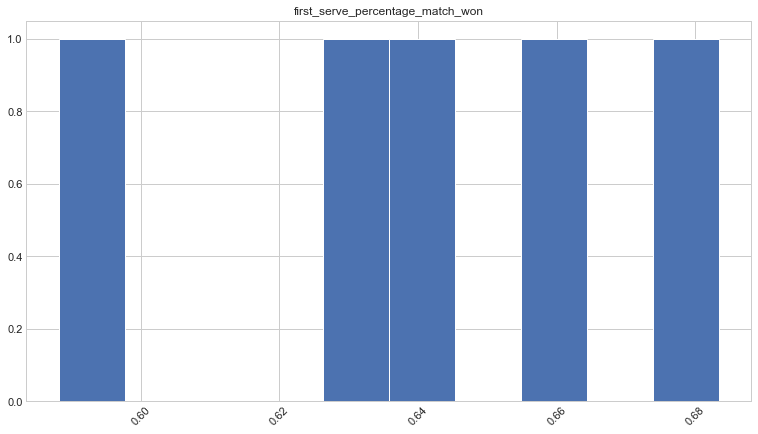

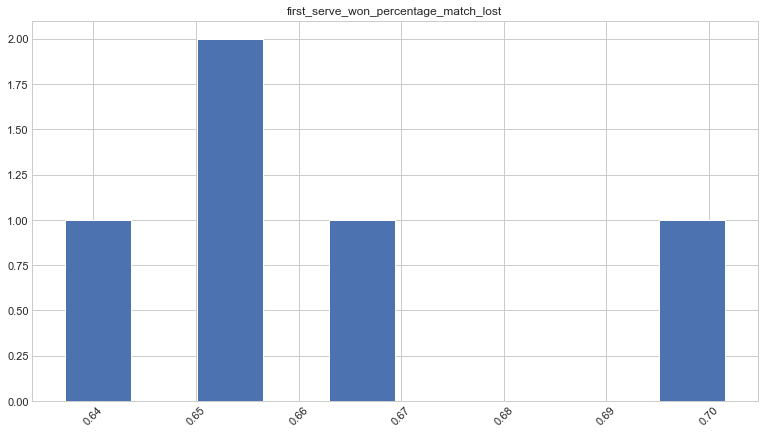

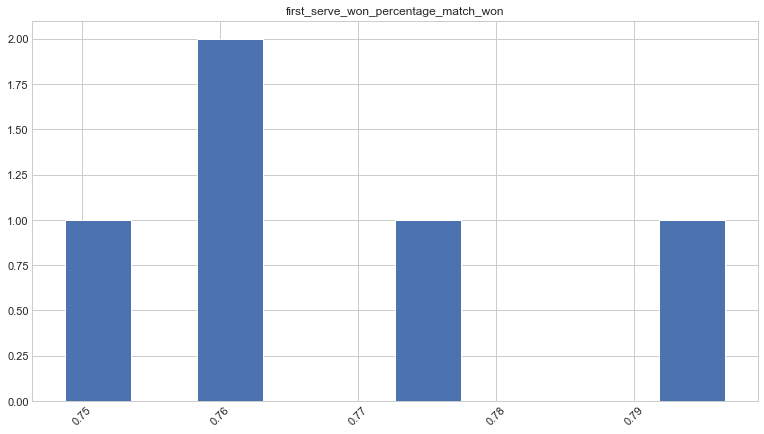

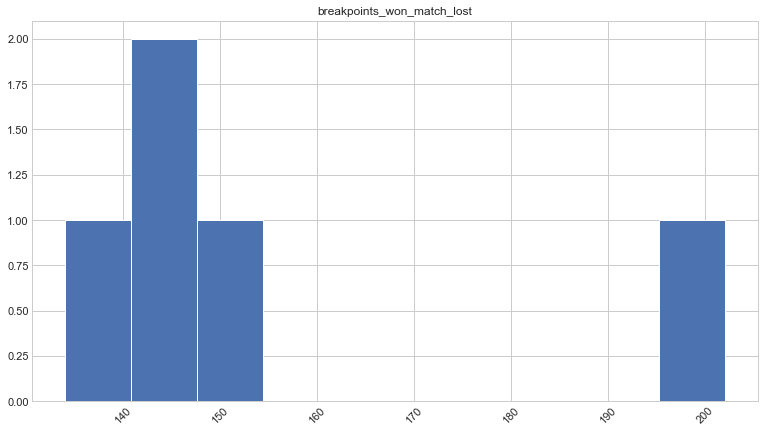

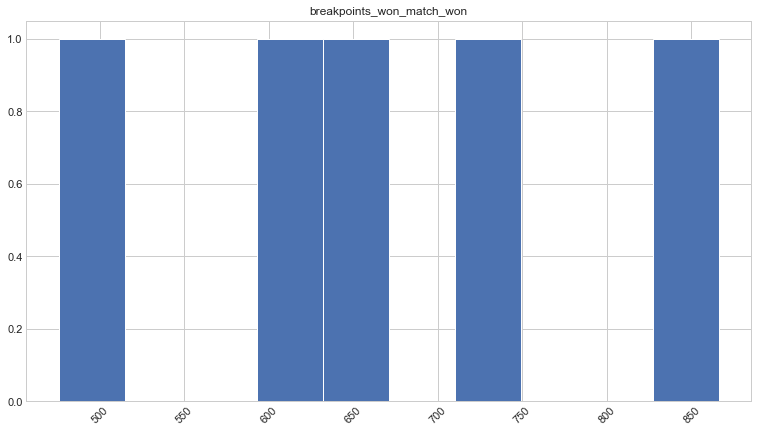

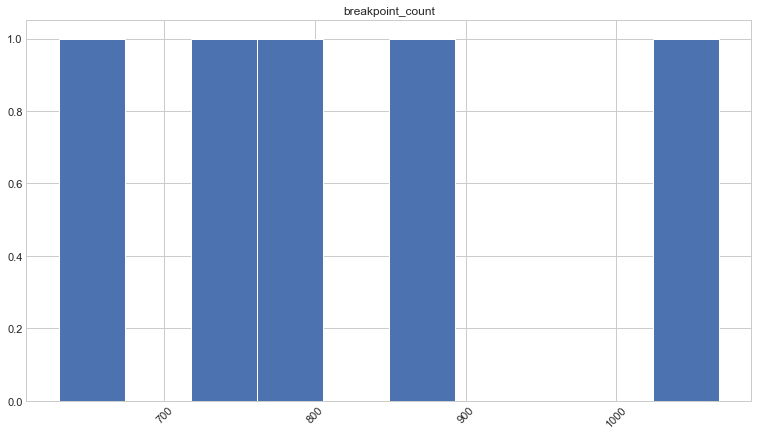

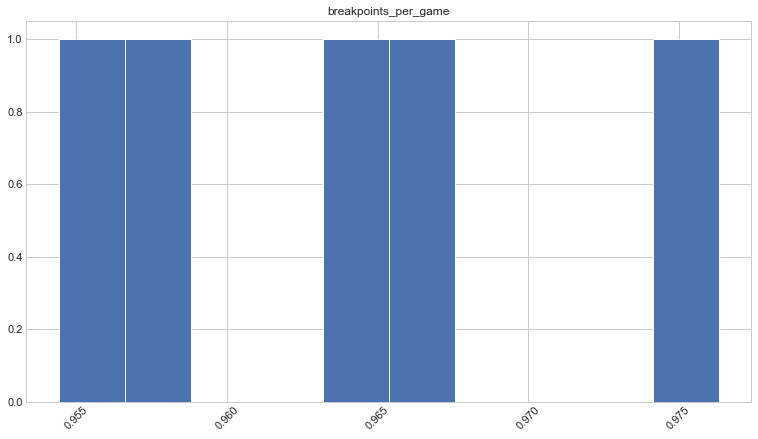

In [17]:
# visualize features for outliers
for col in roger_and_rivals:
    roger_and_rivals[col].hist()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
roger_and_rivals